# Pymaceuticals Inc.







----------------------------------------------------

Please see the written analysis in the dir

# Observation and insights

# Analysis: Summary of Study Results on anti-cancer medications

Prepare the Data

In [29]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [30]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [31]:
# Combine the data into a single dataset

mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


In [32]:
# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice.
    
mouse_num = len(mouse_study_complete["Mouse ID"].unique())

mouse_num


249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_complete[mouse_study_complete[['Mouse ID', 'Timepoint']].duplicated()]


In [35]:
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_ID = mouse_study_complete.loc[mouse_study_complete['Mouse ID']=='g989']
dup_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_data= mouse_study_complete.drop(mouse_study_complete[mouse_study_complete['Mouse ID']=='g989'].index)

mouse_clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice in the clean DataFrame.
mouse_num_updated = len(mouse_clean_data["Mouse ID"].unique())

mouse_num_updated

248

# Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#obtain the unique list of the drug Regimen
mouse_clean_data['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [40]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_statistics_table = mouse_clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median','var','std','sem']})


In [13]:
#Assemble the resulting series into a single summary DataFrame.
    
summary_statistics_table



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

Text(0.5, 1.0, 'Total number of timepoints for all mice tested')

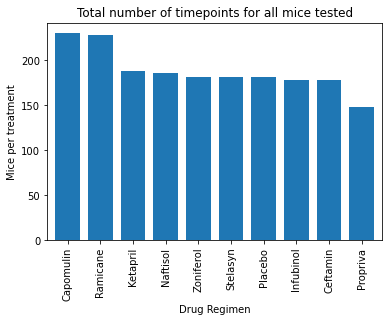

In [64]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = mouse_clean_data['Drug Regimen'].value_counts().plot.bar(width=0.75, zorder=3)

# Set labels for both axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Mice per treatment")
bar_plot.set_title("Total number of timepoints for all mice tested")


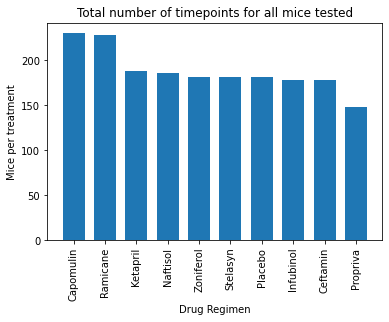

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Calculate the amount of data points for each drug regimen
counts = mouse_clean_data['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel('Drug Regimen')
plt.ylabel("Mice per treatment")
plt.title("Total number of timepoints for all mice tested")

# Display resulting plot
plt.show()

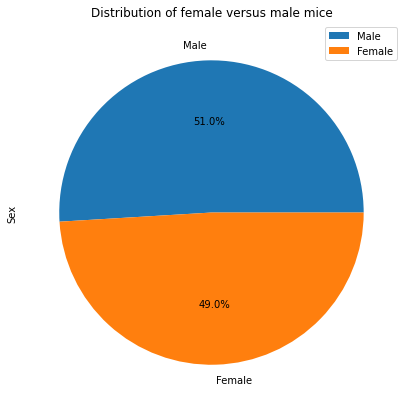

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

count_sex = mouse_clean_data['Sex'].value_counts()

pieplot = count_sex.plot(kind='pie',autopct='%.1f%%',figsize=(7,7),startangle=360)
pieplot.legend(['Male','Female'],loc='best')
pieplot.set_title('Distribution of female versus male mice')
plt.show()

Text(0.5, 1.0, 'Distribution of female versus male mice')

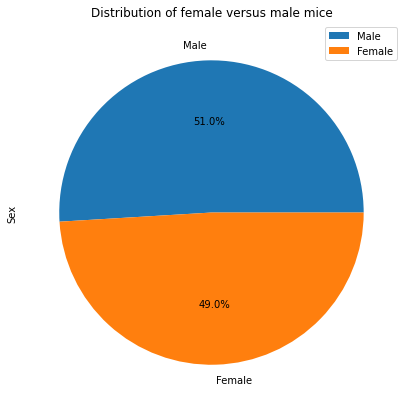

In [66]:
count_sex = mouse_clean_data['Sex'].value_counts()
labels=['Male','Female']
plt.figure(figsize=(7,7))
plt.pie(count_sex,labels=labels,autopct='%.1f%%',startangle=360)
plt.ylabel('Sex')
plt.legend(['Male','Female'],loc='best')
plt.title('Distribution of female versus male mice')


# Quartiles, Outliers and Boxplot


Final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin. Start by getting the last (greatest) timepoint for each mouse

four_regimen_grp = mouse_clean_data.loc[(mouse_clean_data['Drug Regimen']=='Ceftamin')|(mouse_clean_data['Drug Regimen']=='Ramicane')|
                      (mouse_clean_data['Drug Regimen']=='Infubinol')|(mouse_clean_data['Drug Regimen']=='Capomulin')]
# four_regimen_grp

In [46]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint = mouse_clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
lasttimepoint = lasttimepoint.rename(columns={'Timepoint':'Last Timepoint'})

lasttimepoint


,Mouse ID,Last Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [47]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_merged = pd.merge(mouse_clean_data,lasttimepoint,on='Mouse ID',how='inner')

tumor_volume_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


Empty list &  for loop for interquartile range (IQR) and the outliers for each treatment group

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

#Loop to collect mice's final tumor sizes for each treatment:
for treatment in treatments:
    treatment_details = tumor_volume_merged.loc[tumor_volume_merged['Drug Regimen']==treatment]
    tumor_sizes = treatment_details.loc[treatment_details['Timepoint']==treatment_details['Last Timepoint'],'Tumor Volume (mm3)']
    tumor_volume.append(tumor_sizes)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # median = tumor_sizes.median()
    # print(f'Median for {treatment} is {median}')
    quartiles = tumor_sizes.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_boundary = lowerq-(1.5*iqr)
    upper_boundary = upperq+(1.5*iqr)
    print(f'Lower quartile for {treatment} is {lowerq}')
    print(f'Upper quartile for {treatment} is {upperq}')
    print(f'IQR for {treatment} is {iqr}')
    print(f'Lower bound for {treatment} is {lower_boundary}')
    print(f'Upper bound for {treatment} is {upper_boundary}')
    # Determine outliers using upper and lower bounds
    outliers = tumor_sizes.loc[(tumor_sizes<lower_boundary)|(tumor_sizes>upper_boundary)]
    print(f'Values for {treatment} contain {len(outliers)} outliers')
    print('--------------------------------------------')

Lower quartile for Capomulin is 32.37735684
Upper quartile for Capomulin is 40.1592203
IQR for Capomulin is 7.781863460000004
Lower bound for Capomulin is 20.70456164999999
Upper bound for Capomulin is 51.83201549
Values for Capomulin contain 0 outliers
--------------------------------------------
Lower quartile for Ramicane is 31.56046955
Upper quartile for Ramicane is 40.65900627
IQR for Ramicane is 9.098536719999998
Lower bound for Ramicane is 17.912664470000003
Upper bound for Ramicane is 54.30681135
Values for Ramicane contain 0 outliers
--------------------------------------------
Lower quartile for Infubinol is 54.04860769
Upper quartile for Infubinol is 65.52574285
IQR for Infubinol is 11.477135160000003
Lower bound for Infubinol is 36.83290494999999
Upper bound for Infubinol is 82.74144559000001
Values for Infubinol contain 1 outliers
--------------------------------------------
Lower quartile for Ceftamin is 48.72207785
Upper quartile for Ceftamin is 64.29983003
IQR for Cefta

# Box plot

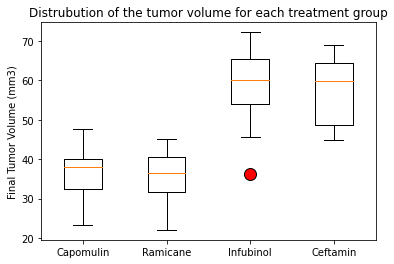

In [63]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# configure outliers on boxplot for visibility within the plot

flierprops = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')
plt.figure(figsize=(6,4))
# Plot boxplot
plt.boxplot(tumor_volume, flierprops=flierprops)
# Add title and labels to boxplot
plt.title('Distrubution of the tumor volume for each treatment group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)

plt.show()


# Line and scatter plots


In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot = tumor_volume_merged.loc[tumor_volume_merged["Mouse ID"] == "l509",:]

lineplot.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
1708,l509,0,45.000000,0,Capomulin,Male,17,21,45
1709,l509,5,45.851193,0,Capomulin,Male,17,21,45
1710,l509,10,46.759074,0,Capomulin,Male,17,21,45
1711,l509,15,47.488599,1,Capomulin,Male,17,21,45
1712,l509,20,48.070452,2,Capomulin,Male,17,21,45


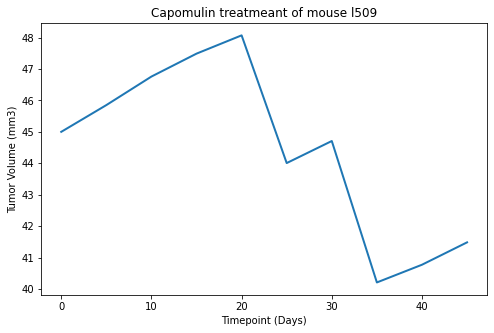

In [24]:
x_axis = lineplot["Timepoint"]
y_axis = lineplot["Tumor Volume (mm3)"]
plt.figure(figsize=(8,5))
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis,y_axis,linewidth=2, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('lineplotchart')
plt.show()

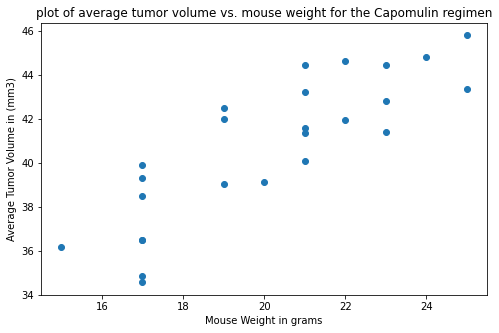

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = list(mouse_clean_data.loc[mouse_clean_data['Drug Regimen']=='Capomulin','Mouse ID'].unique())

weight_m = []
tumor_av = []
for mouse in capomulin_mice:
    weight_m.append((mouse_clean_data.loc[mouse_clean_data['Mouse ID']==mouse,'Weight (g)']).mean())
    tumor_av.append((mouse_clean_data.loc[mouse_clean_data['Mouse ID']==mouse,'Tumor Volume (mm3)']).mean())

plt.figure(figsize=(8,5))
# plt.grid()
plt.title('plot of average tumor volume vs. mouse weight for the Capomulin regimen')
plt.xlabel('Mouse Weight in grams')
plt.ylabel('Average Tumor Volume in (mm3)')
plt.scatter(weight_m,tumor_av,marker='o')
plt.show()


# Correlation and Regression

correlation coefficient

In [26]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(weight_m,tumor_av)
correlation_r=round(correlation[0],3)
correlation_m='{:.2f}'.format(correlation_r)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_m}')

The correlation between mouse weight and the average tumor volume is 0.84


Linear regression model

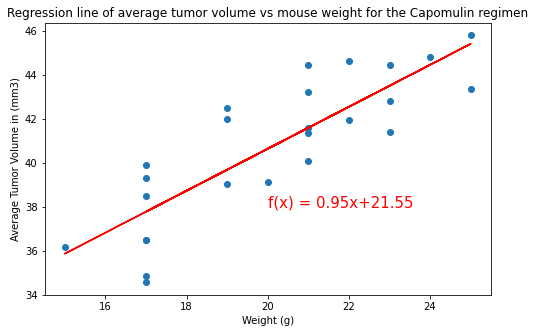

In [27]:
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(weight_m,tumor_av)

#Convert mouse_weight from list to array to be able to run the regression equation
x_values = np.array(weight_m)
regress_values =  intercept + x_values * slope 
Equation_line = 'f(x) = '+str(round(slope,2))+'x+'+str(round(intercept,2))
plt.figure(figsize=(8,5))
# plt.grid()
plt.title('Regression line of average tumor volume vs mouse weight for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume in (mm3)')
plt.annotate(Equation_line,(20,38),fontsize=15,color='red')
plt.plot(weight_m,regress_values,'r-')
plt.scatter(weight_m,tumor_av,marker='o')
plt.show()